<a href="https://colab.research.google.com/github/Aman78695/Retail-Sales-Prediction/blob/main/Retail_Sales(Rossmann)_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **#Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

#Problem Description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#Data Description
Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores Data fields

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from numpy import math
import warnings    
warnings.filterwarnings('ignore')

## **#Data Collection And Feature Description**

In [2]:
#reading the sales csv file and converting to dataframe also converting date column from object type to datetime
file_name= 'Rossmann Stores Data.csv'
df_sales=pd.read_csv(file_name,parse_dates=['Date'])

In [ ]:
#looking at the first fifty rows of dataframe
df_sales.head(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


#The Dataframe Feature Description
**'Store'**:-id for each store.

**'DayOfWeek'** :-the particular day in week in which store operated.

**'Date'**:-rocord date.

**'Sales'** :-the target variable which needs to be predicted,depicting the total sales by store in a day.

**'Customers'**:-the total no. of customers on a particular date.

**'Open'**:-store open or closed 0 for closed 1 for open.

 'Promo':-store running promotion or not on that day

**'StateHoliday'** :-indicating public holiday or weekends.

**'SchoolHoliday'**:-indicating school holiday on that particular date 0 for no holiday 1 for holiday.

In [3]:
#checking the shape of the dataframe
df_sales.shape

(83898, 9)

In [4]:
#checking the datatypes,nullvalues and name of the column
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83898 entries, 0 to 83897
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          83898 non-null  int64         
 1   DayOfWeek      83897 non-null  float64       
 2   Date           83897 non-null  datetime64[ns]
 3   Sales          83897 non-null  float64       
 4   Customers      83897 non-null  float64       
 5   Open           83897 non-null  float64       
 6   Promo          83897 non-null  float64       
 7   StateHoliday   83897 non-null  object        
 8   SchoolHoliday  83897 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 5.8+ MB


In [5]:
#checking the total count of null values in each features
df_sales.isnull().sum()

Store            0
DayOfWeek        1
Date             1
Sales            1
Customers        1
Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [6]:
#dropping the rows with missing values,if any
df_sales=df_sales.dropna()

In [7]:
df_sales.shape

(83897, 9)

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252321 entries, 0 to 252320
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          252321 non-null  int64         
 1   DayOfWeek      252321 non-null  int64         
 2   Date           252321 non-null  datetime64[ns]
 3   Sales          252321 non-null  int64         
 4   Customers      252321 non-null  float64       
 5   Open           252321 non-null  float64       
 6   Promo          252321 non-null  float64       
 7   StateHoliday   252321 non-null  object        
 8   SchoolHoliday  252321 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 19.3+ MB


In [9]:
#checking the null values after removing rows for missing values
df_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

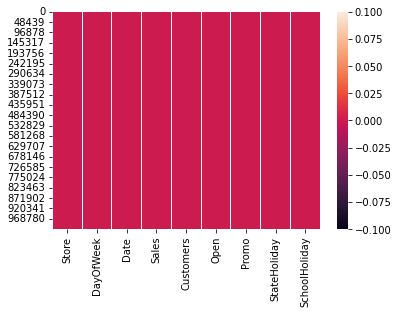

In [ ]:
#analysing the null values through heatmap
sns.heatmap(df_sales.isnull())

we can infer that there are no  null values

we can see the heatmap is clean with  no spot indicating no null values in this dataframe



#Treating the null values

In [ ]:
#creating the list of columns with null values
missing_num_var=[var for var in df_sales.columns if df_sales[var].isnull().sum()>0]
missing_num_var

[]

In [ ]:
#list of numeric columns 
num_var1=['Promo','SchoolHoliday','Store','DayOfWeek','Sales','Customers','Open']

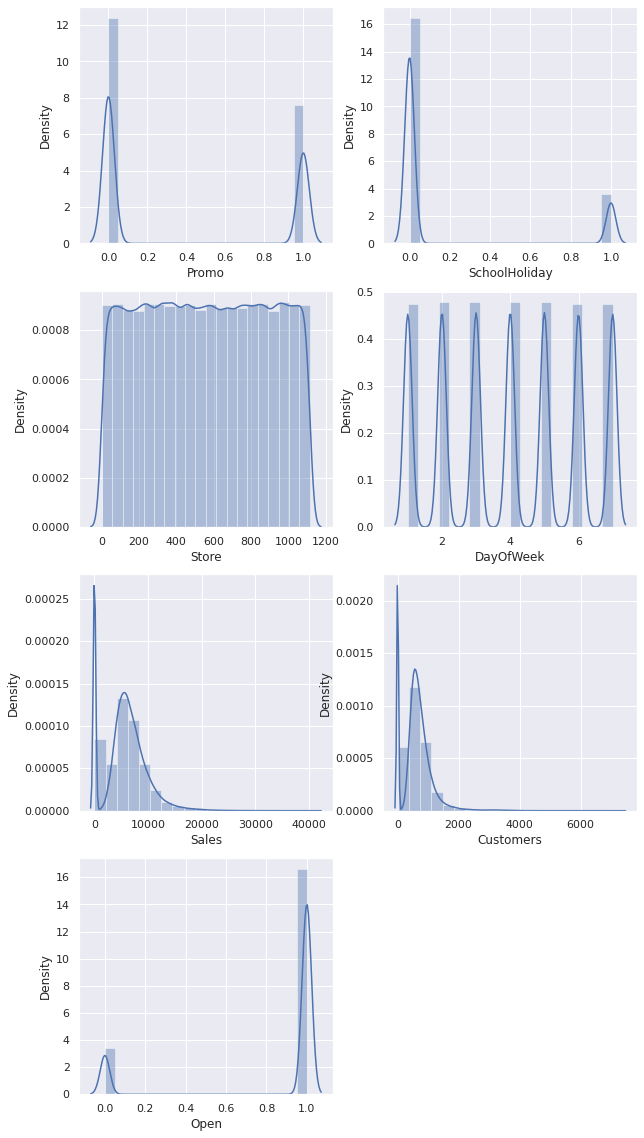

In [ ]:
#first we will check the distribution plot of those column which have numerical values
plt.figure(figsize=(10,20))
sns.set()
for i,var in enumerate(num_var1):
 plt.subplot(4,2,i+1)
 sns.distplot(df_sales[var],bins=20)


Only sales and customers are rightly skewed with outliers,but it is not a good idea to remove these outliers from business point of view.

In [8]:
#reading the another sales csv file and converting to dataframe
file_name= '/content/store.csv'
df_store=pd.read_csv(file_name)

In [ ]:
#looking at the first fifty rows of dataframe
df_store.head(50)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


## **#The Dataframe Feature Description**

**'Store'**:-id for each store

**StoreType**:-different types of store a,b,c,d

**Assortment**:-a = basic, b = extra, c = extended.

**CompetitionDistance** :-distance in meters to the nearest competitor store

**CompetitionOpenSinceMonth**:-gives the time in month when the nearest competitor got opened.

**CompetitionOpenSinceYear**:-gives the time in year when the nearest competitor got opened.

**Promo2**:- is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

In [ ]:
#checking the datatypes,nullvalues and name of the column
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


looking at the info above we can say that there is 1115 rows in dataframe some of the features contain the null values and datatype of features are int,float and object.

In [ ]:
#checking the total count of null values in each features
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

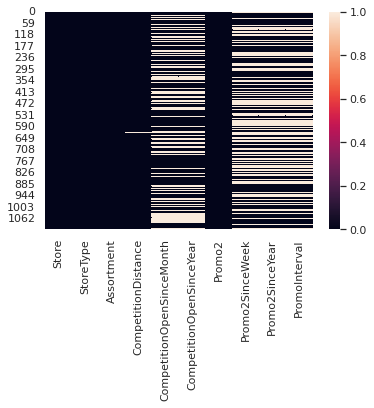

In [ ]:
#analysing the null values through heatmap
sns.heatmap(df_store.isnull())

we can see the spots in heatmap indicating null values it will become clear after the treatment of null values

In [ ]:
#checking the null values in column through percentage
(df_store.isnull().sum()*100)/df_store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

Promo2SinceWeek,Promo2SinceYear,PromoInterval have almost 49% missing values.



In [ ]:
df_store['CompetitionDistance'].value_counts()

250.0     12
1200.0     9
190.0      8
350.0      8
50.0       8
          ..
4490.0     1
8970.0     1
9720.0     1
5290.0     1
1880.0     1
Name: CompetitionDistance, Length: 654, dtype: int64

In [ ]:
df_store['CompetitionOpenSinceMonth'].value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [ ]:
df_store['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

#Treating the null values of categorical feature.

In [9]:
#back of original data
df_store_dup=df_store.copy()

In [ ]:
#count of the values present in categorical features
df_store_dup['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

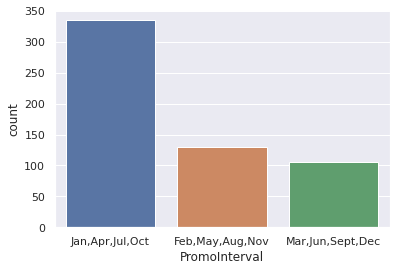

In [ ]:
#count of the values present in categorical feature 'PromoInterval' through plot using seaborn
sns.countplot(df_store['PromoInterval'])
plt.show()

#Looking at the count plot we can fill the missing values with mode in PromoInterval

In [ ]:
#finding the mode of PromoInterval
promointerval_mode=df_store_dup['PromoInterval'].mode()[0]
promointerval_mode

'Jan,Apr,Jul,Oct'

In [ ]:
#filling the missing values with mode and counting the total null values
df_store_dup['PromoInterval'].replace(np.nan,promointerval_mode,inplace=True)
df_store_dup['PromoInterval'].isnull().sum()

0

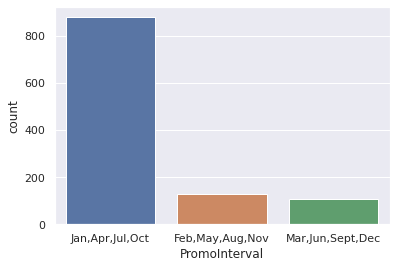

In [ ]:
#count of the values present in categorical feature 'PromoInterval' through plot using seaborn after filling the missing values.
sns.countplot(df_store_dup['PromoInterval'])
plt.show()

#But this is not the good idea to fill the missing values of PromoInterval with mode as it can change our data alot so we will fill the missing values with 0 indicating no promo happened.

In [10]:
#filling the missing values of PromoInterval with 0 as the missing value indicates no promo
df_store_dup['PromoInterval'].fillna(value=0,inplace=True)
df_store_dup['PromoInterval'].isnull().sum()

0

## **#Treating the null values**

In [ ]:
#creating the list of columns with null values
missing_var=[var for var in df_store.columns if df_store[var].isnull().sum()>0]
missing_var

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
#creating the list of numeric columns with null values
missing_num_var=[var for var in df_store.select_dtypes(include=['int64','float64']).columns if df_store[var].isnull().sum()>0]
missing_num_var


['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear']

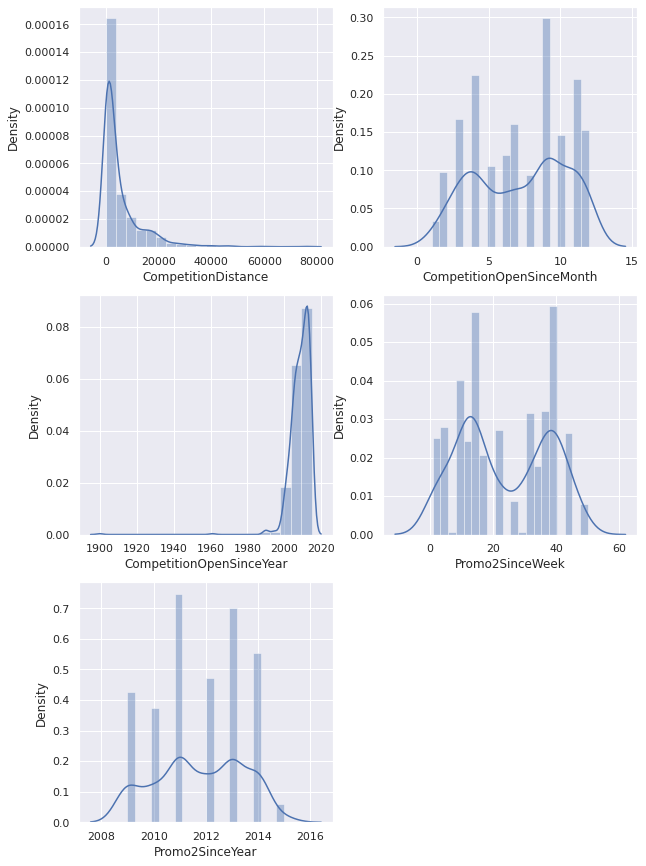

In [ ]:
"""first we will check the distribution plot of those column which have null values if the dist plot is normal then null values can be filled by mean
 if it is skewed the it will be filled by either median or mode"""
plt.figure(figsize=(10,15))
sns.set()
for i,var in enumerate(missing_num_var):
 plt.subplot(3,2,i+1)
 sns.distplot(df_store[var],bins=20)


As we can clearly see from the density plot that CompetitionDistance and CompetitionOpenSinceYear are right and left skewed respectively hence missing values can be filled with median or mode.

In [11]:
# filling competition distance with the median value
df_store_dup['CompetitionDistance'].fillna(df_store_dup['CompetitionDistance'].median(), inplace = True)

In [12]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
df_store_dup['CompetitionOpenSinceMonth'].fillna(df_store_dup['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store_dup['CompetitionOpenSinceYear'].fillna(df_store_dup['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [13]:
# imputing the nan values of promo2 related columns with 0
df_store_dup['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store_dup['Promo2SinceYear'].fillna(value=0,inplace=True)

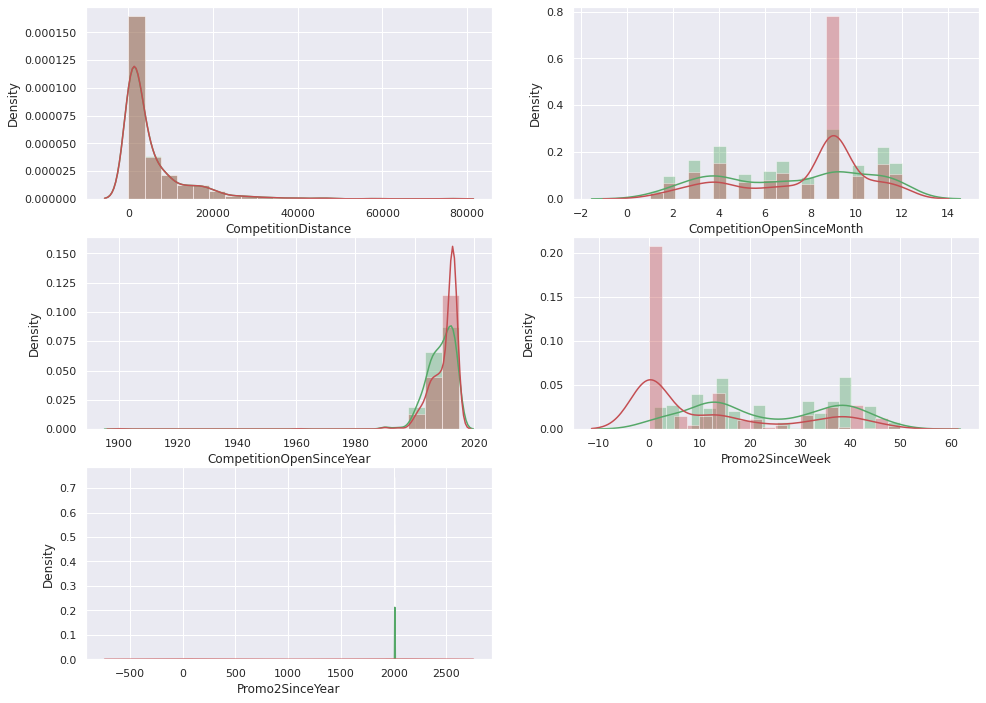

In [ ]:
#checking the distribution plot of numeric features before and after filling the missing values.
plt.figure(figsize=(16,12))
sns.set()
for i,var in enumerate(missing_num_var):
 plt.subplot(3,2,i+1)
 sns.distplot(df_store[var],bins=20,color='g')
 sns.distplot(df_store_dup[var],bins=20,color='r')
 


With these density plot we can clearly
      	observe that after filling the missing
      	values there is no such difference in
      	the distribution plot from the original
      	data.But still Competition Distance and Competition Open Since Year are right and left skewd respectively indicating outliers which needs to be treated.
      	
      	


In [14]:
#cheking the null values after treatment
df_store_dup.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
#merge the datasets on stores data
df = df_sales.merge(right=df_store_dup, on="Store", how="left")
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83892,268,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,4520.0,2.0,2014.0,0,0.0,0.0,0
83893,269,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,c,60.0,6.0,2015.0,0,0.0,0.0,0
83894,270,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,1450.0,7.0,2014.0,0,0.0,0.0,0
83895,271,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,420.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


#Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

> Indented block



**Id **- an Id that represents a (Store, Date) duple within the test





**Store** - a unique Id for each store

**Sales **- the turnover for any given day (this is what you are predicting)

**Customers **- the number of customers on a given day

**Open **- an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType **- differentiates between 4 different store models: a, b, c, d

**Assortment **- describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

**Promo **- indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [16]:
#creating a copy of the original dataset
df2=df.copy()

In [17]:
#dropping the store column as it is unique for each store
df2.drop('Store',axis=1,inplace=True)

In [19]:
#cheking null values,data type and column name for new dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252321 entries, 0 to 252320
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  252321 non-null  int64         
 1   Date                       252321 non-null  datetime64[ns]
 2   Sales                      252321 non-null  int64         
 3   Customers                  252321 non-null  float64       
 4   Open                       252321 non-null  float64       
 5   Promo                      252321 non-null  float64       
 6   StateHoliday               252321 non-null  object        
 7   SchoolHoliday              252321 non-null  float64       
 8   StoreType                  252321 non-null  object        
 9   Assortment                 252321 non-null  object        
 10  CompetitionDistance        252321 non-null  float64       
 11  CompetitionOpenSinceMonth  252321 non-null  float64 

In [20]:
#checking no. of rows and column in the dataframe
df2.shape

(252321, 17)

In [18]:
#checking null values column wise
df2.isnull().sum()

DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# #**Treating Outliers**

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

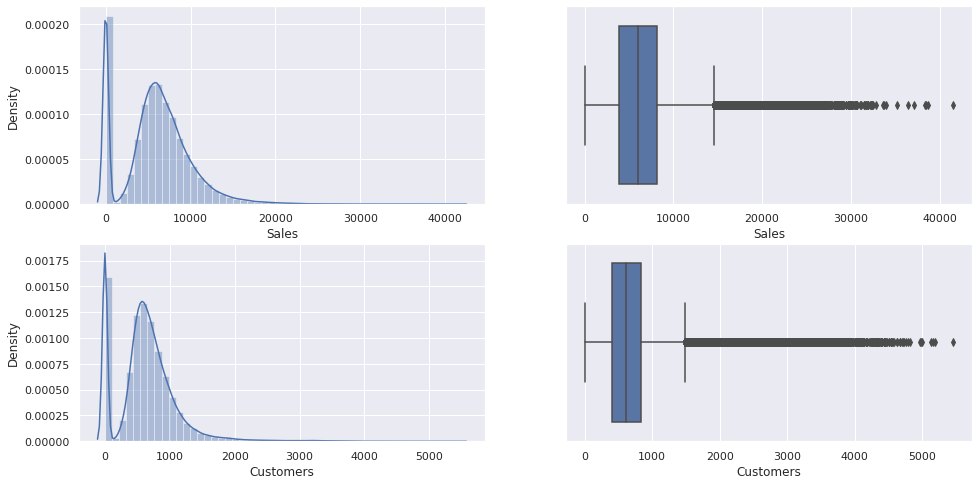

In [ ]:
#seperating some important features for density plot and box plot to treat outliers
imp_features=['Sales','Customers','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['Sales'])
plt.subplot(2,2,2)
sns.boxplot(df2['Sales'])
plt.subplot(2,2,3)
sns.distplot(df2['Customers'])
plt.subplot(2,2,4)
sns.boxplot(df2['Customers'])
plt.show()

The customer and sales distribution plot are rightly skewed and boxplot indicating outliers.But the behaviour is appropriate as the customer increases the sales also increases,so no need to treat these outliers from the business point of view.

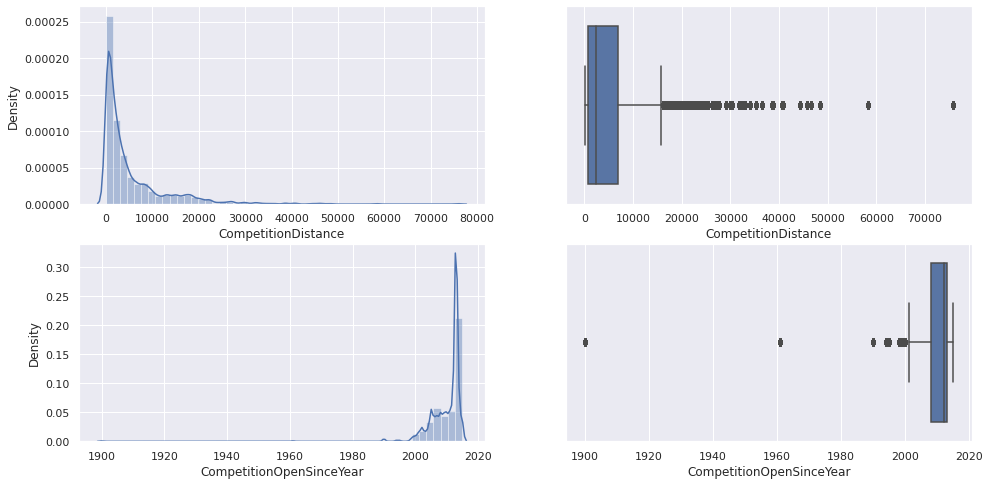

In [ ]:
#Density plot and box plot to check skewness and outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['CompetitionDistance'])
plt.subplot(2,2,2)
sns.boxplot(df2['CompetitionDistance'])
plt.subplot(2,2,3)
sns.distplot(df2['CompetitionOpenSinceYear'])
plt.subplot(2,2,4)
sns.boxplot(df2['CompetitionOpenSinceYear'])
plt.show()

The above two columns need outlier treatment.

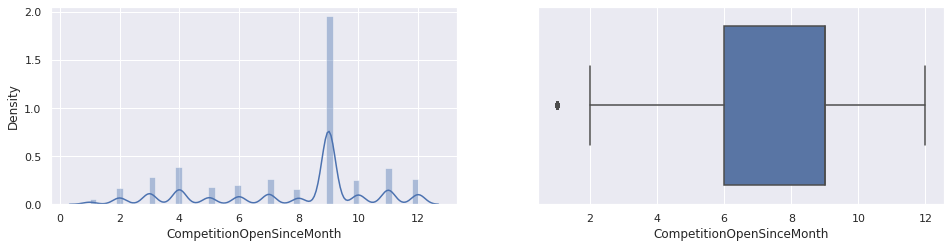

In [ ]:
#Density plot and box plot for CompetitionOpenSinceMonth to check skewness and outliers.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['CompetitionOpenSinceMonth'])
plt.subplot(2,2,2)
sns.boxplot(df2['CompetitionOpenSinceMonth'])
plt.show()

No need for outlier treatment for this particular column.

#Outlier Treatment

**1.**It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.

**2.**The primary reasons for the behaviour are promotion and store type B.
If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features.

 3.It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

#Outliers Treatment using Percentile method


In [19]:
#identifying the maximum and minimum threshold threshold for CompetitionDistance
max_threshold=df2['CompetitionDistance'].quantile(0.95)
min_threshold=df2['CompetitionDistance'].quantile(0.05)

In [20]:
#checking outliers
df2[df2['CompetitionDistance']>max_threshold]

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
6,5.0,2015-07-31,15344.0,1414.0,1.0,1.0,0,1.0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
52,5.0,2015-07-31,7540.0,690.0,1.0,1.0,0,1.0,a,c,30360.0,9.0,2013.0,0,0.0,0.0,0
63,5.0,2015-07-31,13251.0,935.0,1.0,1.0,0,1.0,d,c,22560.0,9.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
74,5.0,2015-07-31,7444.0,807.0,1.0,1.0,0,1.0,d,c,22440.0,12.0,2013.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83746,7.0,2015-05-17,2972.0,359.0,1.0,0.0,0,0.0,a,c,58260.0,4.0,2013.0,0,0.0,0.0,0
83762,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,c,25360.0,10.0,2014.0,0,0.0,0.0,0
83774,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,c,c,31830.0,3.0,2010.0,0,0.0,0.0,0
83876,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,d,c,22330.0,9.0,2013.0,1,5.0,2010.0,"Feb,May,Aug,Nov"


In [21]:
#checking outliers
df2[df2['CompetitionDistance']<min_threshold]

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
16,5.0,2015-07-31,8430.0,946.0,1.0,1.0,0,1.0,a,a,50.0,12.0,2005.0,1,26.0,2010.0,"Jan,Apr,Jul,Oct"
26,5.0,2015-07-31,13213.0,1263.0,1.0,1.0,0,1.0,a,a,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct"
29,5.0,2015-07-31,4776.0,625.0,1.0,1.0,0,1.0,a,a,40.0,2.0,2014.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
165,5.0,2015-07-31,6588.0,898.0,1.0,1.0,0,1.0,a,c,100.0,4.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
171,5.0,2015-07-31,7780.0,891.0,1.0,1.0,0,0.0,a,a,110.0,9.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83796,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,110.0,9.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
83829,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,110.0,12.0,2007.0,0,0.0,0.0,0
83871,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,d,c,70.0,11.0,2010.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
83880,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"


In [23]:
#Now removing the outliers and creating a new dataframe
df3=df2[(df2['CompetitionDistance']<max_threshold)&(df2['CompetitionDistance']>min_threshold)]

In [24]:
df3

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
5,5.0,2015-07-31,5651.0,589.0,1.0,1.0,0,1.0,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83891,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,c,a,2460.0,1.0,2012.0,0,0.0,0.0,0
83892,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,4520.0,2.0,2014.0,0,0.0,0.0,0
83894,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,1450.0,7.0,2014.0,0,0.0,0.0,0
83895,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,420.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


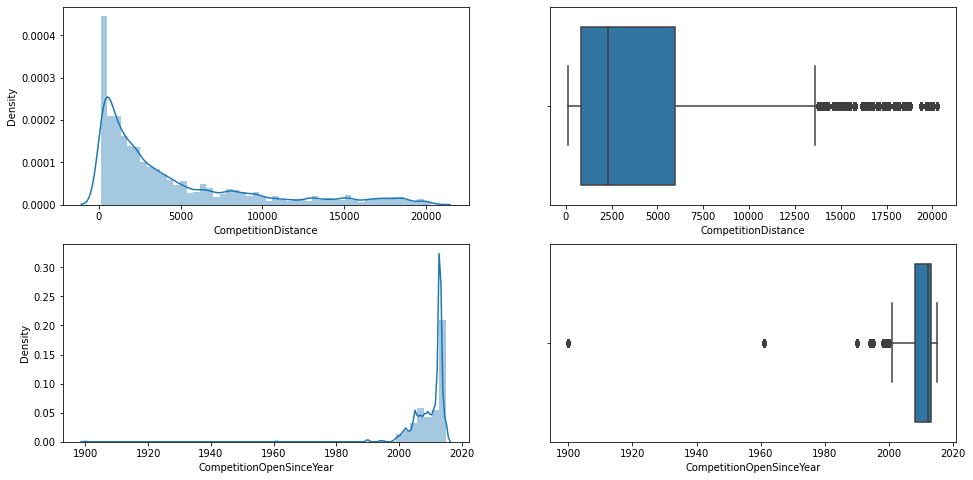

In [ ]:
#Density plot and box plot to check skewness and outliers after outlier treatment
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df3['CompetitionDistance'])
plt.subplot(2,2,2)
sns.boxplot(df3['CompetitionDistance'])
plt.subplot(2,2,3)
sns.distplot(df3['CompetitionOpenSinceYear'])
plt.subplot(2,2,4)
sns.boxplot(df3['CompetitionOpenSinceYear'])
plt.show()

## **EDA**(Exploratory Data Analysis)
Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

#Hypotheses

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

**1.**There's a feature called "DayOfWeek" with the values 1-7 denoting each day of
the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.


**2.**Customers would have a positive correlation with Sales.

**3.**The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

**4.**Promotion should be having a positive correlation with Sales.

**5.**Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.

6.Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251944 entries, 0 to 280268
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  251944 non-null  float64       
 1   Date                       251944 non-null  datetime64[ns]
 2   Sales                      251944 non-null  float64       
 3   Customers                  251944 non-null  float64       
 4   Open                       251944 non-null  float64       
 5   Promo                      251944 non-null  float64       
 6   StateHoliday               251944 non-null  object        
 7   SchoolHoliday              251944 non-null  float64       
 8   StoreType                  251944 non-null  object        
 9   Assortment                 251944 non-null  object        
 10  CompetitionDistance        251944 non-null  float64       
 11  CompetitionOpenSinceMonth  251944 non-null  float64 

In [ ]:
#seperating some important features to do an EDA
imp_features=['Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
[var for var in imp_features]

['Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear']

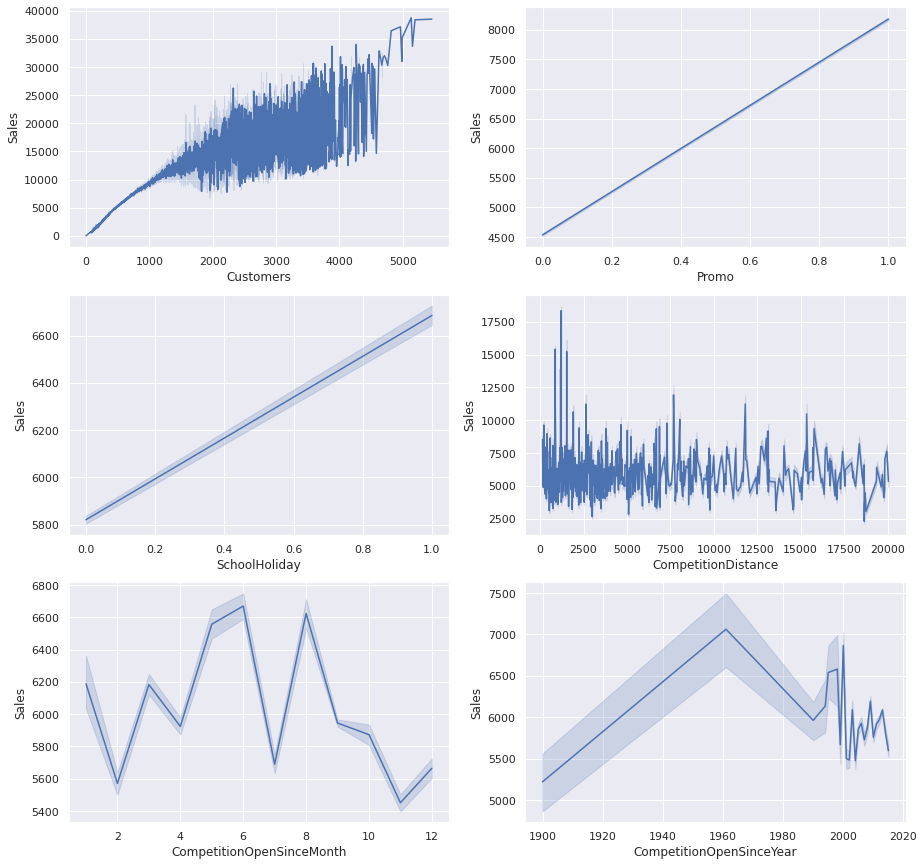

In [ ]:
#checking the relation between the sales and other imp features through lineplot
plt.figure(figsize=(15,15))
sns.set()
for i,var in enumerate(imp_features):
 plt.subplot(3,2,i+1)
 sns.lineplot(x=var,y='Sales',data=df3)

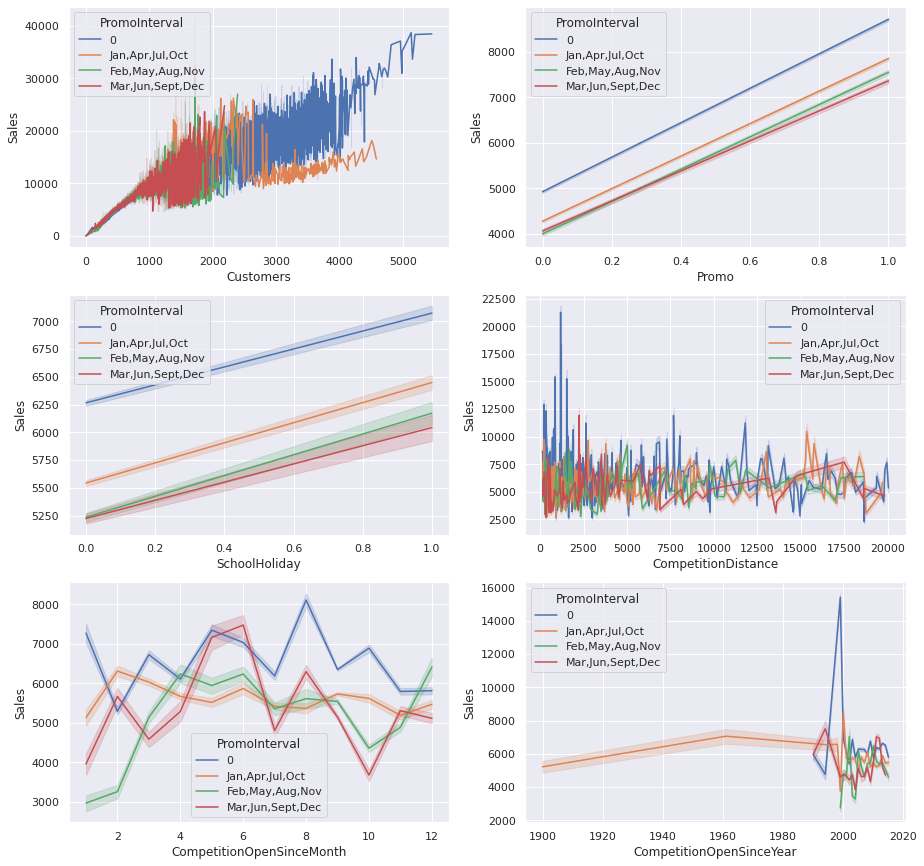

In [ ]:
#checking the relation between the sales and other imp features through lineplot for different promo interval
plt.figure(figsize=(15,15))
sns.set()
for i,var in enumerate(imp_features):
 plt.subplot(3,2,i+1)
 sns.lineplot(x=var,y='Sales',hue='PromoInterval',data=df3)

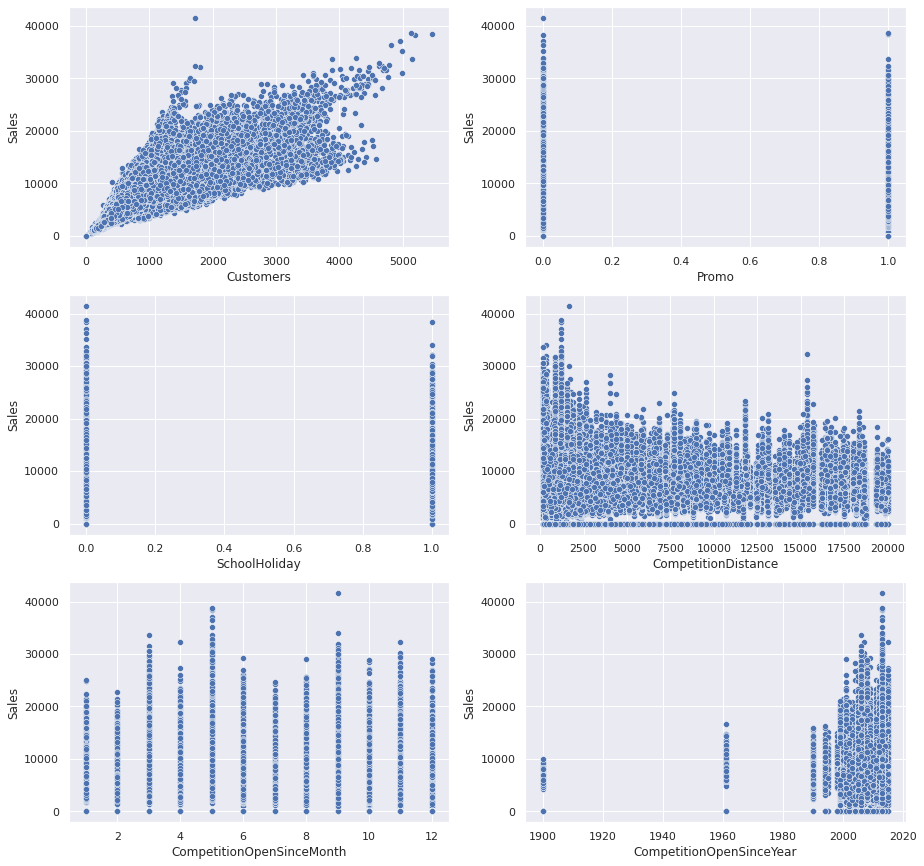

In [ ]:
#checking the relation between sales and different features through scatterplot
plt.figure(figsize=(15,15))
sns.set()
for i,var in enumerate(imp_features):
 plt.subplot(3,2,i+1)
 sns.scatterplot(x=var,y='Sales',data=df3)

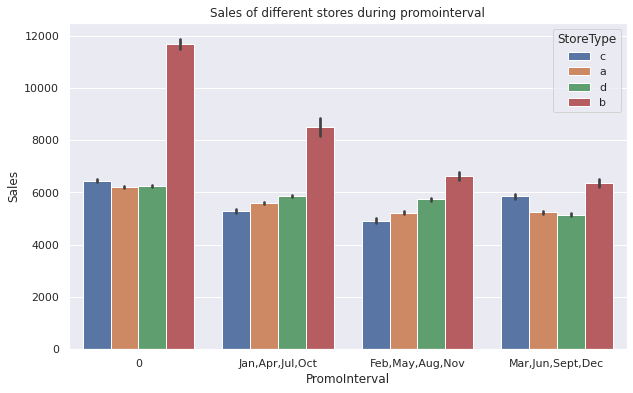

In [ ]:
#sales of different stores during promointerval
plt.figure(figsize=(10,6))
sns.barplot(x='PromoInterval',y='Sales',data=df3,hue='StoreType')
plt.title('Sales of different stores during promointerval')
plt.xlabel('PromoInterval')
plt.show()

Store b has highest sells during promointervals.

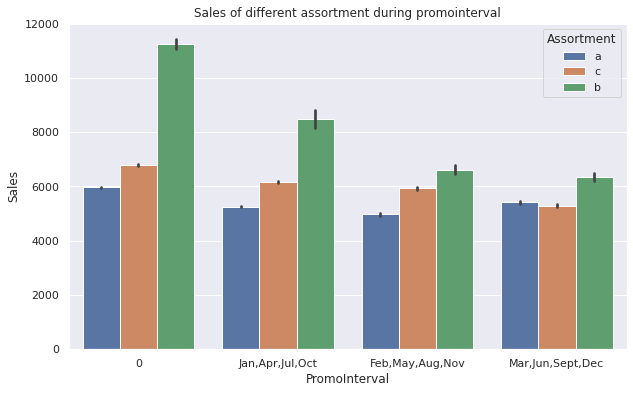

In [ ]:
#sales of different assortment during promointerval.
plt.figure(figsize=(10,6))
sns.barplot(x='PromoInterval',y='Sales',data=df3,hue='Assortment')
plt.title('Sales of different assortment during promointerval')
plt.xlabel('PromoInterval')
plt.show()

Assortment b has highest sales.

In [ ]:
df3['Date'].min()

Timestamp('2014-11-15 00:00:00')

In [ ]:
df3['Date'].max()

Timestamp('2015-07-31 00:00:00')

In [ ]:
df3['Sales'].value_counts()

0.0       43924
6376.0       59
5685.0       59
5674.0       57
6425.0       57
          ...  
735.0         1
1278.0        1
1976.0        1
1579.0        1
1483.0        1
Name: Sales, Length: 17109, dtype: int64

In [25]:
#creating features from the date
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['WeekOfYear'] = df3['Date'].dt.weekofyear
df3['DayOfYear'] = df3['Date'].dt.dayofyear
years = df3['Year'].unique()

In [26]:
df3

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
5,5.0,2015-07-31,5651.0,589.0,1.0,1.0,0,1.0,a,a,...,12.0,2013.0,0,0.0,0.0,0,2015,7,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83891,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,c,a,...,1.0,2012.0,0,0.0,0.0,0,2015,5,20,137
83892,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,...,2.0,2014.0,0,0.0,0.0,0,2015,5,20,137
83894,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,...,7.0,2014.0,0,0.0,0.0,0,2015,5,20,137
83895,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,...,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,5,20,137


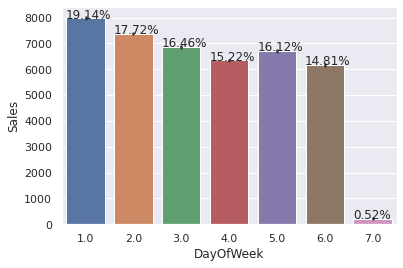

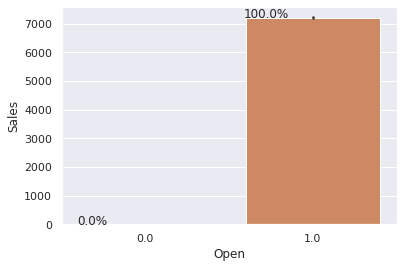

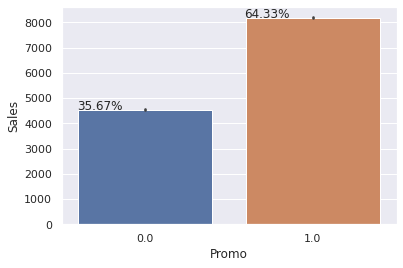

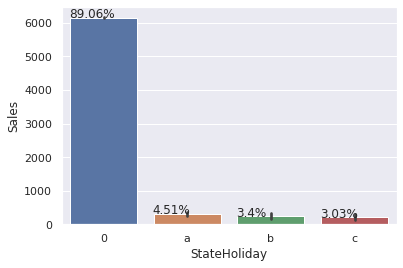

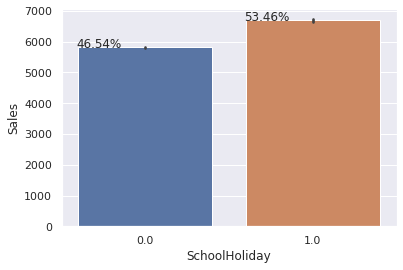

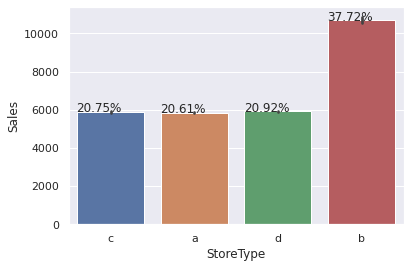

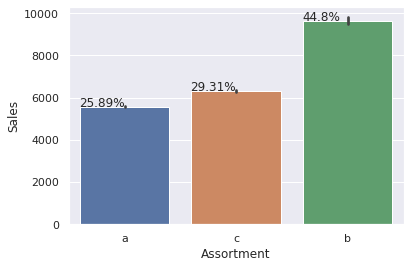

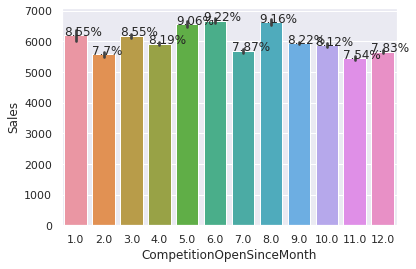

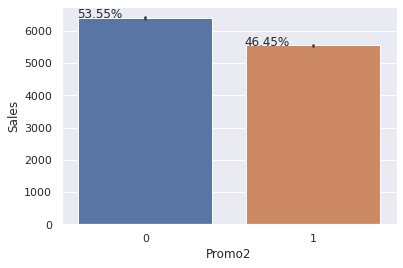

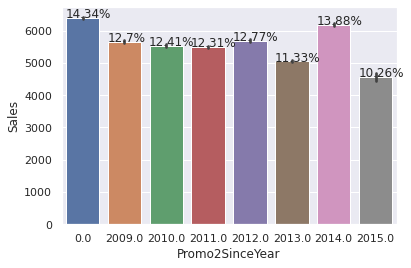

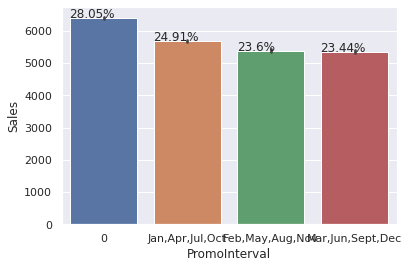

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df3[value], y=df3['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

#Observation:

**1.**There were more sales on Monday, probably because shops generally remain closed on Sundays.

**2.**It could be seen that the Promo leads to more sales.

**3.**Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.

**4.**More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

**5.**On an average Store type B had the highest sales.

6.Highest average sales were seen with Assortment levels-b which is 'extra'.
With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

In [27]:
df3['Year'].value_counts()

2015    211576
2014     14099
Name: Year, dtype: int64

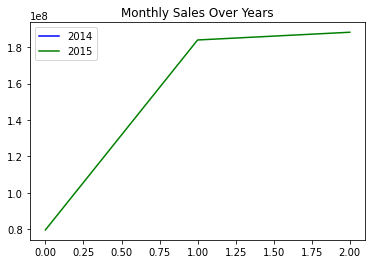

In [27]:
#sales over the years

sales_df_2014 = df3[df3['Year']==2014]
sales_df_2015 = df3[df3['Year']== 2015]
#monthly sales

sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()
#plotting

plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

#Observation:
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

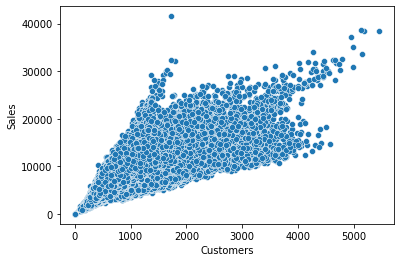

In [29]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df3['Customers'], y=df3['Sales'])
plt.show()

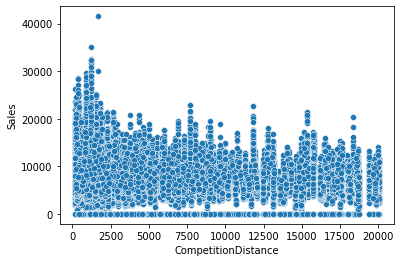

In [28]:
#scatterplot of CompetitionDistance and Sales
sns.scatterplot(x=df3['CompetitionDistance'], y=df3['Sales'])
plt.show()

#Observation:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

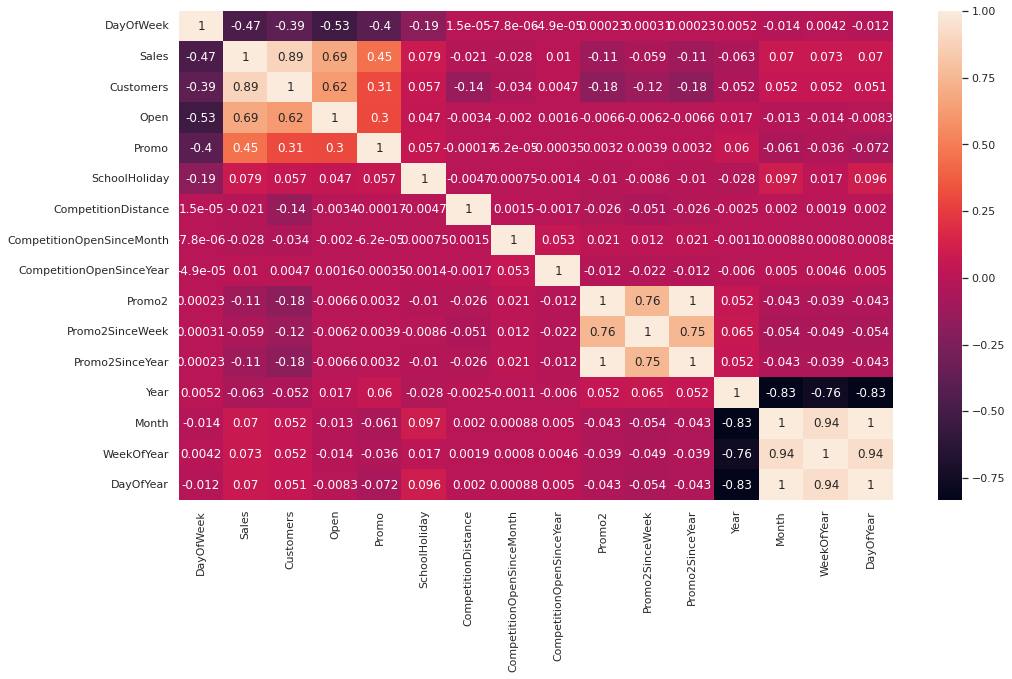

In [ ]:
#checking correlation of the features and target variable through heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(),annot=True)
plt.show()

#Observation:
**1.**Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

**2.**State Holiday has a positive correlation  indicating high sales.

**3.**CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.

**4.**There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

5.The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

In [30]:
#creating a copy of original dataframe
df4=df3.copy()

In [31]:
#dropping Promo2SinceWeek feature as it shows multicollinearity with some of the features.
df4.drop('Promo2SinceWeek',axis=1,inplace=True)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251944 entries, 0 to 280268
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DayOfWeek                       251944 non-null  float64       
 1   Date                            251944 non-null  datetime64[ns]
 2   Sales                           251944 non-null  float64       
 3   Customers                       251944 non-null  float64       
 4   Open                            251944 non-null  float64       
 5   Promo                           251944 non-null  float64       
 6   SchoolHoliday                   251944 non-null  float64       
 7   CompetitionDistance             251944 non-null  float64       
 8   CompetitionOpenSinceMonth       251944 non-null  float64       
 9   CompetitionOpenSinceYear        251944 non-null  float64       
 10  Promo2                          251944 non-null  int64  

In [32]:
#dropping one of the year column as there are two year column in the dataframe.
df4.drop('year',axis=1,inplace=True)

KeyError: ignored

In [33]:
df4

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0,2015,7,31,212
1,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0,2015,7,31,212
5,5,2015-07-31,5651,589.0,1.0,1.0,0,1.0,a,a,310.0,12.0,2013.0,0,0.0,0,2015,7,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252315,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,a,a,1060.0,5.0,2012.0,0,0.0,0,2014,12,50,348
252316,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,d,c,18010.0,9.0,2007.0,0,0.0,0,2014,12,50,348
252317,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,d,a,6260.0,11.0,2009.0,0,0.0,0,2014,12,50,348
252319,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,d,c,7170.0,8.0,2014.0,1,2013.0,"Feb,May,Aug,Nov",2014,12,50,348


#One Hot Encoding

In [34]:
#converting the categorical values in the features by numeric values by creating dummy variable
df4=pd.get_dummies(df4,columns=['StateHoliday','Assortment','StoreType','PromoInterval'] )



In [36]:
#after one hot encoding the number of column has increased
df4.shape

(225675, 31)

In [37]:
#creating a copy of original dataframe
df5=df4.copy()

In [38]:
#dropping the date column from the dataframe
df5.drop(['Date'],axis=1,inplace=True)

#Selecting Dependent and Independent Variable

In [39]:
#creating a vector of target variable(dependent variable) i.e. sales
y=df4['Sales'].values
y

array([5263, 6064, 8314, ...,    0,    0,    0])

In [ ]:
y.shape

(277137,)

In [40]:
#creating a matrix of independent variable 
df5.drop(['Sales'],axis=1,inplace=True)

In [42]:
X=df5.values

In [ ]:
X

array([[  5., 555.,   1., ...,   0.,   0.,   0.],
       [  5., 625.,   1., ...,   0.,   1.,   0.],
       [  5., 821.,   1., ...,   0.,   1.,   0.],
       ...,
       [  4., 480.,   1., ...,   0.,   1.,   0.],
       [  4., 846.,   1., ...,   0.,   0.,   0.],
       [  4., 596.,   1., ...,   0.,   1.,   0.]])

#TrainTest Split And Standardization

In [43]:
#splitting the datasets into tain and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
X_train

array([[5.000e+00, 5.000e+02, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 1.092e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 4.430e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 8.190e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+00, 1.014e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 4.930e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [44]:
#feature scaling
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


#Linear Regression

In [ ]:
#creating the object of machine learning model and training the data
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting the values of test datasets
y_test_pred=reg.predict(X_test)
y_test_pred

array([4343.37748927, 5177.38234469, 7458.78709563, ..., 7702.3995478 ,
       4787.06579241, 4407.93335736])

In [ ]:
#predicting the values of train datasets.
y_train_pred=reg.predict(X_train)

In [ ]:
y_test

array([ 4418.,  4896.,  4718., ..., 12197.,  4518.,  3941.])

In [ ]:
y_train

array([4651., 9663., 4875., ..., 9795., 7893., 4819.])

Evaluation Metrics for LinearRegression

In [ ]:
#Evaluation metrics for LinearRegression 
print("LinerarRegression score for training dataset:",reg.score(X_train,y_train))
print("LinearRegression score for testing dataset:",reg.score(X_test,y_test))
print(" ")
print("LinearRegression r2_score for training dataset:",r2_score(y_train,y_train_pred))
print("LinearRegression r2_score for testing dataset:",r2_score(y_test,y_test_pred))
print(" ")
print("LinearrRegression mean_squared_error for training dataset:",mean_squared_error(y_train,y_train_pred))
print("LinearrRegression mean_squared_error for testing dataset:",mean_squared_error(y_test,y_test_pred))
print(" ")
print("LinearrRegression RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("LinearrRegression RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred)))
print(" ")
print("LinearrRegression MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred))
print("LinearrRegression MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred))



LinerarRegression score for training dataset: 0.900782955472085
LinearRegression score for testing dataset: 0.9008190832598643
 
LinearRegression r2_score for training dataset: 0.900782955472085
LinearRegression r2_score for testing dataset: 0.9008190832598643
 
LinearrRegression mean_squared_error for training dataset: 1529344.495219654
LinearrRegression mean_squared_error for testing dataset: 1539654.3394205498
 
LinearrRegression RMSE for training dataset: 1236.666687195727
LinearrRegression RMSE for testing dataset: 1240.828086166875
 
LinearrRegression MAPE for training dataset: 4.330090282685447e+17
LinearrRegression MAPE for testing dataset: 4.332721886071496e+17


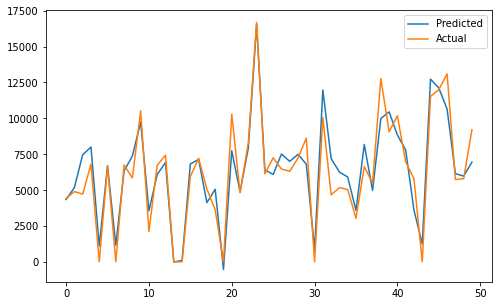

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()


#Ridge Regression without hyperparameter tuning

In [ ]:
#Creating the object for Machine learning model and training the model for the same
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
#predicting the values for X_test
y_test_pred_ridge=ridge.predict(X_test)

In [ ]:
#predicting the values for training dataset
y_train_pred_ridge=ridge.predict(X_train)

**Evaluation metrics for Ridge Regression**

In [ ]:
#Evaluation metrics for RidgeRegression without hyperparameter tuning
print("RidgeRegression score for training dataset:",ridge.score(X_train,y_train))
print("RidgeRegression score for testing dataset:",ridge.score(X_test,y_test))
print(" ")
print("RidgeRegression r2_score for training dataset:",r2_score(y_train,y_train_pred_ridge))
print("RidgeRegression r2_score for testing dataset:",r2_score(y_test,y_test_pred_ridge))
print(" ")
print("RidgeRegression MSE for training dataset:",mean_squared_error(y_train,y_train_pred_ridge))
print("RidgeRegression MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_ridge))
print(" ")
print("RidgeRegression RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_ridge)))
print("RidgeRegression RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_ridge)))
print(" ")
print("RidgeRegression MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_ridge))
print("RidgeRegression MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_ridge))


RidgeRegression score for training dataset: 0.9007204843855741
RidgeRegression score for testing dataset: 0.9007660405046746
 
RidgeRegression r2_score for training dataset: 0.9007204843855741
RidgeRegression r2_score for testing dataset: 0.9007660405046746
 
RidgeRegression MSE for training dataset: 1530307.4327141184
RidgeRegression MSE for testing dataset: 1540477.7589944643
 
RidgeRegression RMSE for training dataset: 1237.0559537523427
RidgeRegression RMSE for testing dataset: 1241.159844256357
 
RidgeRegression MAPE for training dataset: 4.3155031433925344e+17
RidgeRegression MAPE for testing dataset: 4.321666013569699e+17


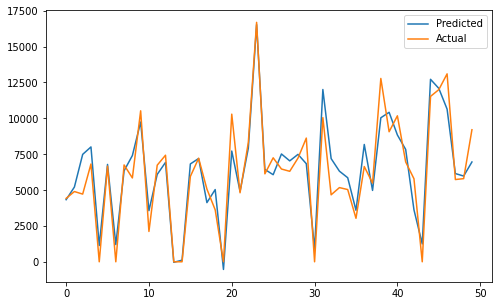

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_ridge[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

#Ridge Regression with Hyperparametwr tuning

In [ ]:
# Hyperprarameter tuning
ridge1 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge1_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge1_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge1_regressor.best_params_)
print("\nUsing ",ridge1_regressor.best_params_, " the negative mean squared error is: ", ridge1_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -1529903.4628894664


In [ ]:
#Model prediction with training dataset
y_pred_ridge_hyp_train=ridge1_regressor.predict(X_train)

In [ ]:
#Model Prediction with testing dataset
y_pred_ridge_hyp_test = ridge1_regressor.predict(X_test)

Evaluation metrics for RidgeRegression with hyperparameter tuning.

In [ ]:
#Evaluation metrics for RidgeRegression with hyperparameter tuning
print("RidgeRegression_hyp score for training dataset:",ridge1_regressor.score(X_train,y_train))
print("RidgeRegression_hyp score for testing dataset:",ridge1_regressor.score(X_test,y_test))
print(" ")
print("RidgeRegression_hyp r2_score for training dataset:",r2_score(y_train,y_pred_ridge_hyp_train))
print("RidgeRegression_hyp r2_score for testing dataset:",r2_score(y_test,y_pred_ridge_hyp_test))
print(" ")
print("RidgeRegression_hyp MSE for training dataset:",mean_squared_error(y_train,y_pred_ridge_hyp_train))
print("RidgeRegression_hyp MSE for testing dataset:",mean_squared_error(y_test,y_pred_ridge_hyp_test))
print(" ")
print("RidgeRegression_hyp RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_pred_ridge_hyp_train)))
print("RidgeRegression_hyp RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_pred_ridge_hyp_test)))
print(" ")
print("RidgeRegression_hyp MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_pred_ridge_hyp_train))
print("RidgeRegression_hyp MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_pred_ridge_hyp_test))

RidgeRegression_hyp score for training dataset: -1529344.499707297
RidgeRegression_hyp score for testing dataset: -1539653.9219725737
 
RidgeRegression_hyp r2_score for training dataset: 0.9007829551809468
RidgeRegression_hyp r2_score for testing dataset: 0.9008191101508826
 
RidgeRegression_hyp MSE for training dataset: 1529344.499707297
RidgeRegression_hyp MSE for testing dataset: 1539653.9219725737
 
RidgeRegression_hyp RMSE for training dataset: 1236.6666890101378
RidgeRegression_hyp RMSE for testing dataset: 1240.8279179534018
 
RidgeRegression_hyp MAPE for training dataset: 4.3300637559855994e+17
RidgeRegression_hyp MAPE for testing dataset: 4.33270388726295e+17


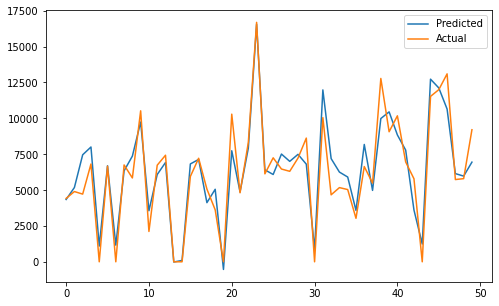

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge_hyp_test[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

#Lasso Regression Without Hyperparameter tuning

In [ ]:
#Creating the object for Machine learning model and training the model for the same
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
#predicting the values for X_train
y_train_pred_lasso=lasso.predict(X_train)

In [ ]:
#predicting the values for X_test
y_test_pred_lasso=lasso.predict(X_test)

**Evaluation Metrics for Lasso Regression**

In [ ]:
#Evaluation metrics for LassoRegression without hyperparameter tuning
print("LassoRegression score for training dataset:",lasso.score(X_train,y_train))
print("LassoRegression score for testing dataset:",lasso.score(X_test,y_test))
print(" ")
print("LassoRegression r2_score for training dataset:",r2_score(y_train,y_train_pred_lasso))
print("LassoRegression r2_score for testing dataset:",r2_score(y_test,y_test_pred_lasso))
print(" ")
print("LassoRegression MSE for training dataset:",mean_squared_error(y_train,y_train_pred_lasso))
print("LassoRegression MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_lasso))
print(" ")
print("LassoRegression RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_lasso)))
print("LassoRegression RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print(" ")
print("LassoRegression MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_lasso))
print("LassoRegression MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_lasso))

LassoRegression score for training dataset: 0.9006218706072421
LassoRegression score for testing dataset: 0.9006822823915992
 
LassoRegression r2_score for training dataset: 0.9006218706072421
LassoRegression r2_score for testing dataset: 0.9006822823915992
 
LassoRegression MSE for training dataset: 1531827.4783853278
LassoRegression MSE for testing dataset: 1541777.9944278186
 
LassoRegression RMSE for training dataset: 1237.670181585275
LassoRegression RMSE for testing dataset: 1241.6835323172402
 
LassoRegression MAPE for training dataset: 4.2816697463994963e+17
LassoRegression MAPE for testing dataset: 4.2818095885669523e+17


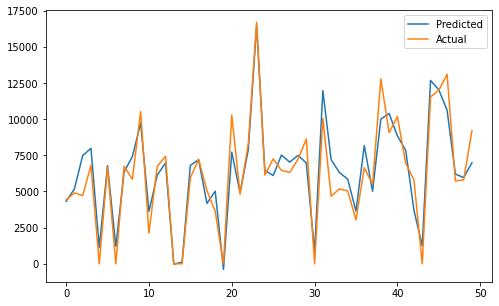

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_lasso[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

#Lasso Regression With Hyperparameter Tuning

In [ ]:
# Hyperprarameter tuning
lasso1 = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso1_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
lasso1_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#finding the best values of hyperparameter obtained
print("The best fit alpha value is found out to be :" ,lasso1_regressor.best_params_)
print("\nUsing ",lasso1_regressor.best_params_, " the negative mean squared error is: ", lasso1_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -1529870.4302859576


In [ ]:
#Model prediction for X_train
y_train_pred_lasso_hyp=lasso1_regressor.predict(X_train)

In [ ]:
#Model prediction for X_test
y_test_pred_lasso_hyp=lasso1_regressor.predict(X_test)

Evaluation metrics for LassoRegression with hyperparameter tuning.

In [ ]:
#Evaluation metrics for LassoRegression with hyperparameter tuning
print("LassoRegression_hyp score for training dataset:",lasso1_regressor.score(X_train,y_train))
print("LassoRegression_hyp score for testing dataset:",lasso1_regressor.score(X_test,y_test))
print(" ")
print("LassoRegression_hyp r2_score for training dataset:",r2_score(y_train,y_train_pred_lasso_hyp))
print("LassoRegression_hyp r2_score for testing dataset:",r2_score(y_test,y_test_pred_lasso_hyp))
print(" ")
print("LassoRegression_hyp MSE for training dataset:",mean_squared_error(y_train,y_train_pred_lasso_hyp))
print("LassoRegression_hyp MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_lasso_hyp))
print(" ")
print("LassoRegression_hyp RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_lasso_hyp)))
print("LassoRegression_hyp RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_lasso_hyp)))
print(" ")
print("LassoRegression_hyp MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_lasso_hyp))
print("LassoRegression_hyp MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_lasso_hyp))

LassoRegression_hyp score for training dataset: -1529344.499707297
LassoRegression_hyp score for testing dataset: -1539653.9219725737
 
LassoRegression_hyp r2_score for training dataset: 0.9007829551809468
LassoRegression_hyp r2_score for testing dataset: 0.9008191101508826
 
LassoRegression_hyp MSE for training dataset: 1529344.499707297
LassoRegression_hyp MSE for testing dataset: 1539653.9219725737
 
LassoRegression_hyp RMSE for training dataset: 1236.6666890101378
LassoRegression_hyp RMSE for testing dataset: 1240.8279179534018
 
LassoRegression_hyp MAPE for training dataset: 4.3300637559855994e+17
LassoRegression_hyp MAPE for testing dataset: 4.33270388726295e+17


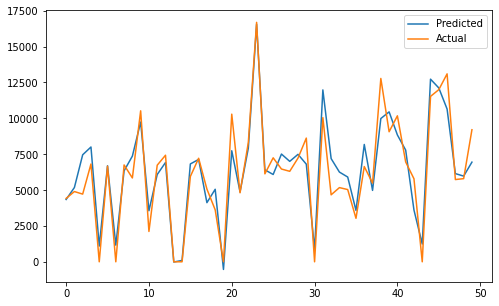

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_lasso_hyp[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

#Decision Tree Regressor without hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_decision_tree=DecisionTreeRegressor()
reg_decision_tree.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
#Model prediction for testing dataset
y_test_pred_decision_tree=reg_decision_tree.predict(X_test)

In [ ]:
#Model prediction for training dataset
y_train_pred_decision_tree=reg_decision_tree.predict(X_train)

Evaluation metrics for DecisionTree without hyperparameter tuning.

In [ ]:
#Evaluation metrics for DecisionTree without hyperparameter tuning
print("DecisionTree score for training dataset:",reg_decision_tree.score(X_train,y_train))
print("DecisionTree score for testing dataset:",reg_decision_tree.score(X_test,y_test))
print(" ")
print("DecisionTree r2_score for training dataset:",r2_score(y_train,y_train_pred_decision_tree))
print("DecisionTree r2_score for testing dataset:",r2_score(y_test,y_test_pred_decision_tree))
print(" ")
print("DecisionTree MSE for training dataset:",mean_squared_error(y_train,y_train_pred_decision_tree))
print("DecisionTree MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_decision_tree))
print(" ")
print("DecisionTree RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_decision_tree)))
print("DecisionTree RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_decision_tree)))
print(" ")
print("DecisionTree MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_decision_tree))
print("DecisionTree MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_decision_tree))

DecisionTree score for training dataset: 0.9999997734901103
DecisionTree score for testing dataset: 0.9659955637948691
 
DecisionTree r2_score for training dataset: 0.9999997734901103
DecisionTree r2_score for testing dataset: 0.9659955637948691
 
DecisionTree MSE for training dataset: 3.4914530531339607
DecisionTree MSE for testing dataset: 527874.5093671068
 
DecisionTree RMSE for training dataset: 1.8685430295109504
DecisionTree RMSE for testing dataset: 726.5497294522288
 
DecisionTree MAPE for training dataset: 2.679722994967667e-06
DecisionTree MAPE for testing dataset: 0.062211701533658285


The model seems to have overfitted as the testing error is large and training error is less.

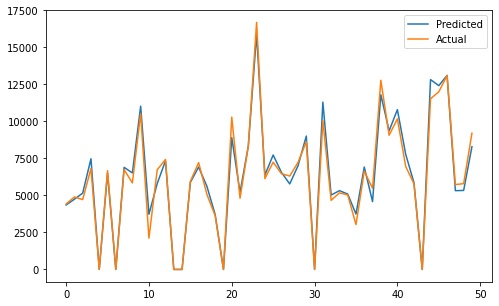

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_decision_tree[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

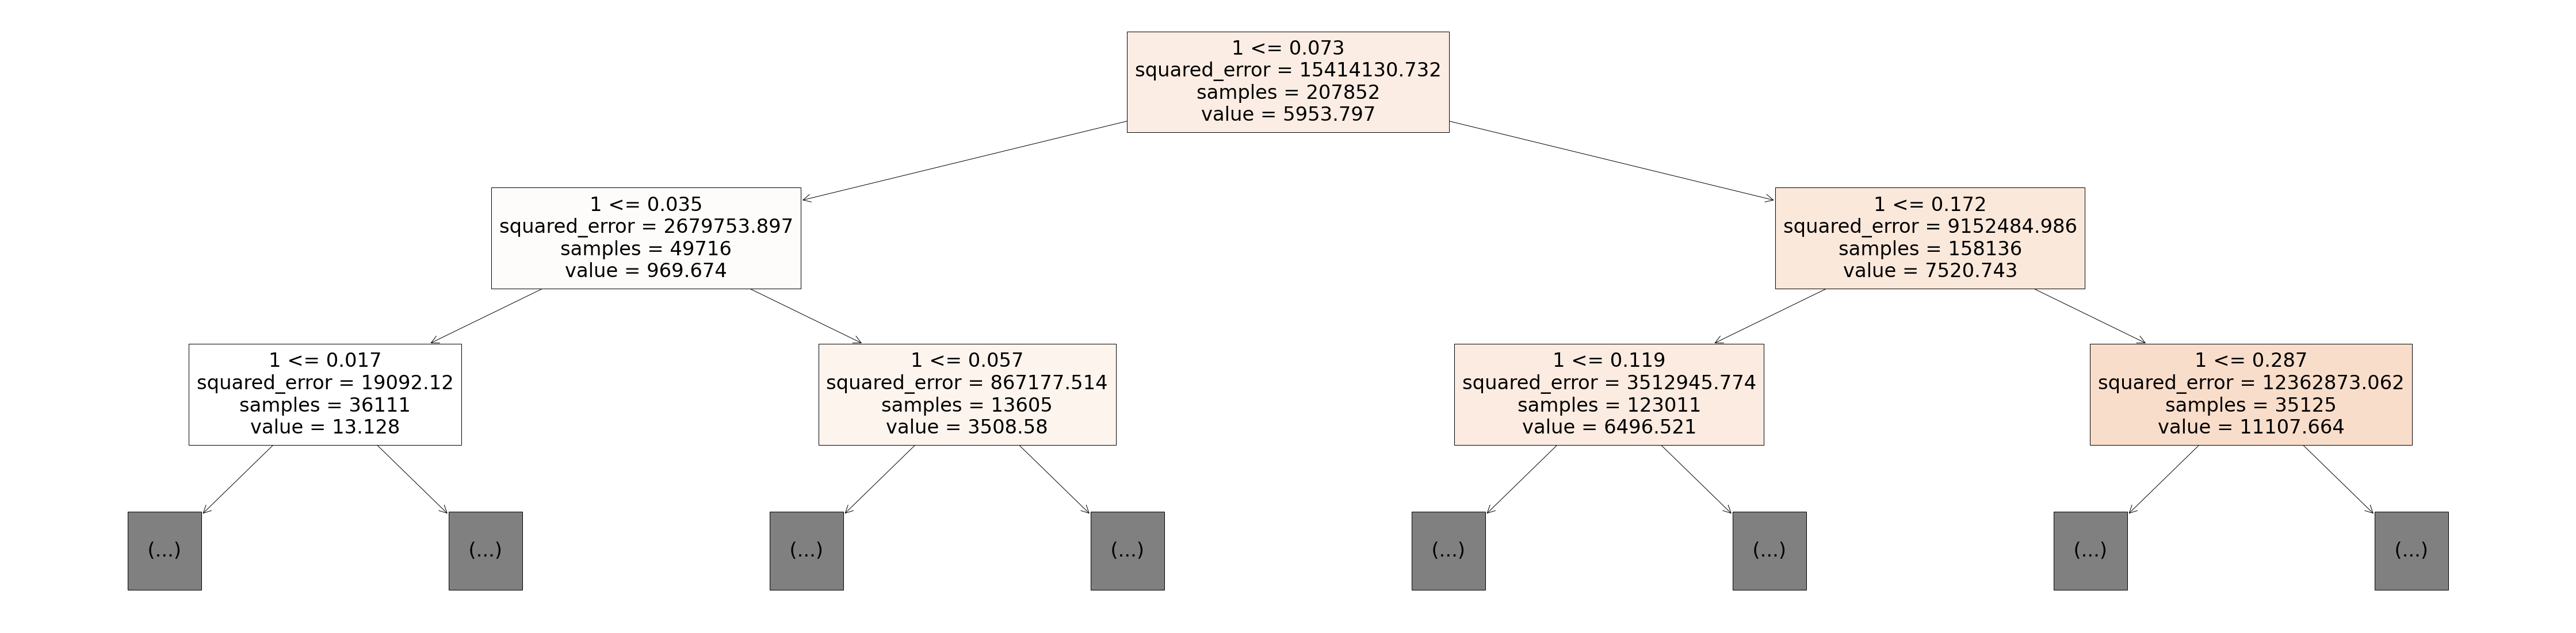

In [ ]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(reg_decision_tree, feature_names=pd.DataFrame(X_train).columns, max_depth=2, filled=True);

#Decision Tree Regressor with hyperparameter tuning

In [ ]:
# #another script that takes toooo long, to find the right parameters for tree
# reg_decision_tree= DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# tuning_model = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# tuning_model.fit(X_train, y_train)
# tuning_model.best_params_

I trained Model with hyper parameters..to not run everytime i record the result

Here are our best parameters for Decision Tree

{ min_samples_split=5,min_samples_leaf=8 }

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:
#Model prediction for X_train
y_train_pred_decision_tree_hyp = treereg.predict(X_train)
#Model prediction for X_test
y_test_pred_decision_tree_hyp = treereg.predict(X_test)

Evaluation metrics for DecisionTree with hyperparameter tuning.

In [ ]:
#Evaluation metrics for DecisionTree with hyperparameter tuning
print("DecisionTree_hyp score for training dataset:",treereg.score(X_train,y_train))
print("DecisionTree_hyp score for testing dataset:",treereg.score(X_test,y_test))
print(" ")
print("DecisionTree_hyp r2_score for training dataset:",r2_score(y_train,y_train_pred_decision_tree_hyp))
print("DecisionTree_hyp r2_score for testing dataset:",r2_score(y_test,y_test_pred_decision_tree_hyp))
print(" ")
print("DecisionTree_hyp MSE for training dataset:",mean_squared_error(y_train,y_train_pred_decision_tree_hyp))
print("DecisionTree_hyp MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_decision_tree_hyp))
print(" ")
print("DecisionTree_hyp RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_decision_tree_hyp)))
print("DecisionTree_hyp RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_decision_tree_hyp)))
print(" ")
print("DecisionTree_hyp MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_decision_tree_hyp))
print("DecisionTree_hyp MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_decision_tree_hyp))

DecisionTree_hyp score for training dataset: 0.9824678722220436
DecisionTree_hyp score for testing dataset: 0.9686351321760809
 
DecisionTree_hyp r2_score for training dataset: 0.9824678722220436
DecisionTree_hyp r2_score for testing dataset: 0.9686351321760809
 
DecisionTree_hyp MSE for training dataset: 270242.5095837385
DecisionTree_hyp MSE for testing dataset: 486898.6538708503
 
DecisionTree_hyp RMSE for training dataset: 519.848544851035
DecisionTree_hyp RMSE for testing dataset: 697.7812363992388
 
DecisionTree_hyp MAPE for training dataset: 0.04427584762493161
DecisionTree_hyp MAPE for testing dataset: 0.05872568123552392


**With hyperparameter tuning in decision tree the problem of overfitting has been resolved as difference in training and testing error is less.**

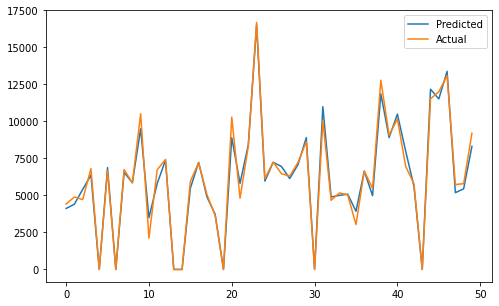

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_decision_tree_hyp [0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

# **#Random Forest Regression**

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
#Model prediction for X_train
y_train_pred_rf = rf.predict(X_train)
#Model prediction for X_test
y_test_pred_rf= rf.predict(X_test)

**Evaluation metrics of RandomForest without hyperparameter tuning.**

In [ ]:
#Evaluation metrics for DecisionTree with hyperparameter tuning
print("rf score for training dataset:",rf.score(X_train,y_train))
print("rf score for testing dataset:",rf.score(X_test,y_test))
print(" ")
print("rf r2_score for training dataset:",r2_score(y_train,y_train_pred_rf))
print("rf r2_score for testing dataset:",r2_score(y_test,y_test_pred_rf))
print(" ")
print("rf MSE for training dataset:",mean_squared_error(y_train,y_train_pred_rf))
print("rf MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_rf))
print(" ")
print("rf RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_rf)))
print("rf RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_rf)))
print(" ")
print("rf MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_rf))
print("rf MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_rf))

rf score for training dataset: 0.9975569131712207
rf score for testing dataset: 0.98341721556677
 
rf r2_score for training dataset: 0.9975569131712207
rf r2_score for testing dataset: 0.98341721556677
 
rf MSE for training dataset: 37658.05976901414
rf MSE for testing dataset: 257426.09416682454
 
rf RMSE for training dataset: 194.05684674603506
rf RMSE for testing dataset: 507.37175144742196
 
rf MAPE for training dataset: 241807496879.79065
rf MAPE for testing dataset: 0.045049077571642976


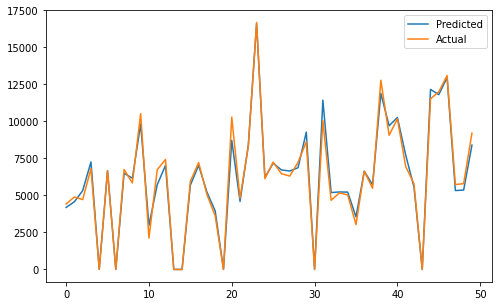

In [ ]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_rf [0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

**RandomForest Regression with hyperparameter tuning.**

In [45]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [3],
    'min_samples_leaf': [5],
    'min_samples_split': [12],
    'n_estimators': [100]
}
# Create a based model
rf1 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [12], 'n_estimators': [100]},
             verbose=2)

In [47]:
#Model prediction for X_train
y_train_pred_rf1_hyp = grid_search.predict(X_train)
#Model prediction for X_test
y_test_pred_rf1_hyp= grid_search.predict(X_test)

**Evaluation metrics for Random Forest Regressor with hyperparameter.**

In [48]:
#Evaluation metrics for RandomForest with hyperparameter tuning
print("rf1_hyp score for training dataset:",grid_search.score(X_train,y_train))
print("rf1_hyp score for testing dataset:",grid_search.score(X_test,y_test))
print(" ")
print("rf1_hyp r2_score for training dataset:",r2_score(y_train,y_train_pred_rf1_hyp))
print("rf1_hyp r2_score for testing dataset:",r2_score(y_test,y_test_pred_rf1_hyp))
print(" ")
print("rf1_hyp MSE for training dataset:",mean_squared_error(y_train,y_train_pred_rf1_hyp))
print("rf1_hyp MSE for testing dataset:",mean_squared_error(y_test,y_test_pred_rf1_hyp))
print(" ")
print("rf1_hyp RMSE for training dataset:",math.sqrt(mean_squared_error(y_train,y_train_pred_rf1_hyp)))
print("rf1_hyp RMSE for testing dataset:",math.sqrt(mean_squared_error(y_test,y_test_pred_rf1_hyp)))
print(" ")
print("rf1_hyp MAPE for training dataset:",mean_absolute_percentage_error(y_train,y_train_pred_rf1_hyp))
print("rf1_hyp MAPE for testing dataset:",mean_absolute_percentage_error(y_test,y_test_pred_rf1_hyp))

rf1_hyp score for training dataset: 0.9517740083594961
rf1_hyp score for testing dataset: 0.9400802438371919
 
rf1_hyp r2_score for training dataset: 0.9517740083594961
rf1_hyp r2_score for testing dataset: 0.9400802438371919
 
rf1_hyp MSE for training dataset: 740043.7107157686
rf1_hyp MSE for testing dataset: 909221.1444131008
 
rf1_hyp RMSE for training dataset: 860.2579326665744
rf1_hyp RMSE for testing dataset: 953.5308827788961
 
rf1_hyp MAPE for training dataset: 1.4229857605066734e+16
rf1_hyp MAPE for testing dataset: 1.6361307042570278e+16


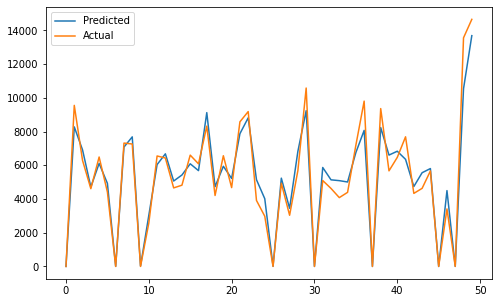

In [49]:
#lineplot for actual value X_test and predicted value of X_test
plt.figure(figsize=(8,5))
plt.plot(y_test_pred_rf1_hyp[0:50])
plt.plot(y_test[0:50])
plt.legend(["Predicted","Actual"])
plt.show()

**Baseline Model: Decision Tree**

A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively.

**Observation:**

**1.**The baseline model- Decision tree was chosen considering our
features were mostly categorical with few having continuous importance. 

**2.**The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points.


**3.**Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.

4.If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting.

**Model Performance and Evaluation:-**

The dataset used in this analysis has:-



A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this    analysis. This kind of dataset has patterns such as peak days, festive seasons etc. which would most  likely be considered as outliers in simple linear regression.


Having X columns with 30% continuous and 70% categorical features, businesses prefer the model to be interpretable in nature and decision-based algorithms work better with categorical data. Hence a simple decision tree was used as a baseline model.


The baseline model completely overfitted the data with a train R2 of 0.99999 and test R2 of 0.96599 .To prevent overfitting we built random forest model.
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.



Random Forest Regressor results were much better than our baseline model with a test R2 of 0.98341.



Tuning the hyperparameters gave the results with a test R2 of 0.94008.


**Conclusion and Recommendations:-**


  Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to   empower themselves with powerful and strategic business plans Important decisions such as budgets, hiring,   incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is   going to make in the coming months and for these plans to be as effective as they are planned to be it is   important for these forecasts to also be as good. Some important conclusions drawn from the analysis are as   follows.

  The positive effect of promotion on Customers and Sales.
  Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far   away probably indicating competition in busy locations vs remote locations.

  Store type B though being few had the highest sales average. The reasons Include all three kinds of   assortments specially assortment level b which is only available at type b stores and being open on Sundays   as well.

  The outliers in the dataset showed justifiable behavior. The outliers were either of store type b or had      promotion going on which increased sales.

**Recommendations:-**

  More stores should be encouraged for someone. Store type B should be increased in numbers. There's a         	seasonality involved hence the stores should be encouraged to promote and take advantage of the days.
